In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
df_train = pd.read_csv("C:\\Users\\ABHAS\\Downloads\\Train_Data.csv")

In [186]:
df_train.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [187]:
df_train.shape

(25920, 18)

In [188]:
df_train.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [189]:
df_train['Physical activity'].value_counts()

Physical activity
0.0    21503
1.0     3444
Name: count, dtype: int64

<Axes: ylabel='Age'>

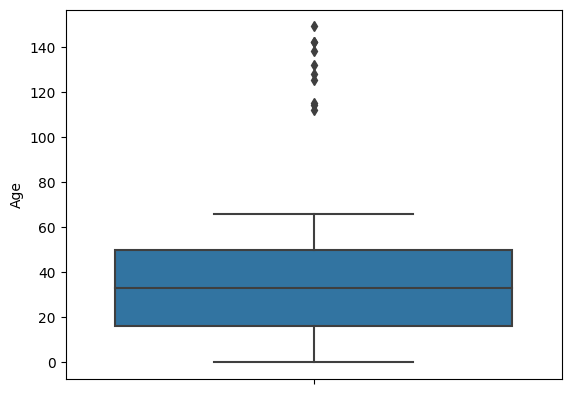

In [190]:
sns.boxplot(data=df_train, y='Age', hue='BMI')

In [191]:
l = df_train[(df_train.Age > 100) | (df_train.BMI < 15.00) ].index.tolist()

In [192]:
df_train.drop(index=l,inplace=True)

In [193]:
df_train.shape

(25910, 18)

In [194]:
df_train.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                0
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

<Axes: >

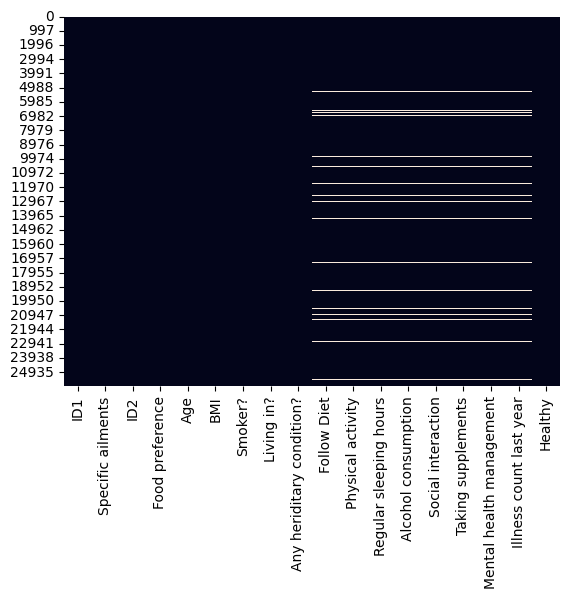

In [136]:
sns.heatmap(df_train.isnull(),cbar=False)

In [195]:
df_train = df_train.dropna(axis=0, how='any')

In [196]:
df_train.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [197]:
df_train.drop(columns=['Food preference'],inplace=True)

In [198]:
df_train.drop(columns=['ID1','ID2'],inplace=True)

In [199]:
df_train.dtypes

Specific ailments              int64
Age                            int64
BMI                          float64
Smoker?                       object
Living in?                    object
Any heriditary condition?     object
Follow Diet                  float64
Physical activity            float64
Regular sleeping hours       float64
Alcohol consumption          float64
Social interaction           float64
Taking supplements           float64
Mental health management     float64
Illness count last year      float64
Healthy                        int64
dtype: object

In [142]:
from sklearn.preprocessing import LabelEncoder

In [183]:
test['Smoker?'] = test['Smoker?'].replace('Cannot say', 'YES')

In [200]:
lab_en = LabelEncoder()
df_train['Smoker?'] = lab_en.fit_transform(df_train['Smoker?'])


In [201]:
test['Smoker?'] = lab_en.transform(test['Smoker?'])

In [202]:
df_train['Living in?'] = lab_en.fit_transform(df_train['Living in?'])
test['Living in?'] = lab_en.transform(test['Living in?'])

In [203]:
df_train['Any heriditary condition?'] = lab_en.fit_transform(df_train['Any heriditary condition?'])
test['Any heriditary condition?'] = lab_en.transform(test['Any heriditary condition?'])

In [204]:
lis = df_train.select_dtypes(include=['object']).columns.tolist()

In [205]:
lis

[]

In [206]:
y = df_train.iloc[:,14]
X = df_train.iloc[:,:14]

In [207]:
X.shape

(24937, 14)

In [208]:
y.shape

(24937,)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [101]:
X.head()

,Specific ailments,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,44,49,20.500470,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,39,20,26.076580,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,29,1,21.420866,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,27,30,25.203247,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9,40,19.355846,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
scal = StandardScaler()
X_train_scaled = scal.fit_transform(X)

In [211]:
test_scaled = scal.transform(test)

In [156]:
X_test_scaled = scal.transform(X_test)

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
logr = LogisticRegression(random_state=1)
model = logr.fit(X,y)

c:\Users\ABHAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
l = model.predict(test_scaled).tolist()

c:\Users\ABHAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [377]:
model.score(X_test_scaled,y_test)

0.6978080727078322

In [175]:
ans = pd.DataFrame(data=l, columns=['predictions'])

In [176]:
ans.to_csv('prediction.csv')

In [379]:
from sklearn.svm import SVC

In [380]:
sv = SVC(kernel='sigmoid',max_iter=200)
model1 = sv.fit(X_train_scaled,y_train)

c:\Users\ABHAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [177]:
test = pd.read_csv("C:\\Users\\ABHAS\\Downloads\\Test_Data (1).csv")

In [178]:
test.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [180]:
test = test.fillna(1)

In [181]:
test.drop(columns='Food preference',inplace=True)

In [182]:
test.drop(columns=['ID1','ID2'],inplace=True)